---

**<font color="green">Комментарий наставника</font>**

Привет, Андрей! Ты хорошо справился с проектом.

По ходу тетрадки ты найдешь комментарии к проекту, они будут в отдельных ячейках Markdown с заголовком «Комментарий наставника». Постарайся учесть эти комментарии в ходе выполнения дальнейших проектов.

Пожалуйста, не удаляй комментарии.

---

Я буду красить комментарии цветом:

<div class="alert alert-block alert-danger">
    

### Комментарий от наставника

Такой комментарий нужно исправить обязательно, он критически влияет на удачное выполнение проекта.
</div>
    
---

<div class="alert alert-block alert-warning">
    

### Комментарий от наставника


Такой комментарий является рекомендацией или советом. Можешь использовать их на своё усмотрение.
</div>

---

<div class="alert alert-block alert-success">
    

### Комментарий от наставника

Такой комментарий в начале проекта означает, что работа принята. В основной части работы комментарии такого цвета говорят о том, что было сделано что-то качественное и правильное =)
</div>

---

<div class="alert alert-block alert-success">
    

### Комментарий от наставника

Поздравляю! Проект принят =)
</div>
    
---


# Аналитика средствами Python

У вас есть файлы, в которых содержатся результаты запросов из предыдущих заданий.

query_1.csv — результат первого запроса. В нём содержится информация о:
model — модели самолета
flights_amount — количество рейсов для каждой модели самолетов model в сентябре 2018 года

query_3.csv — результат третьего запроса. В нём содержится информация о:
city — городах
average_flights — среднем количестве рейсов, прибывающих в город city за день в сентябре 2018 года

## Для этих двух наборов данных нужно:
- импортировать файлы;
- изучить данные в них;
- проверить типы данных на корректность;
- выбрать топ-10 городов по количеству рейсов;

### Постройте графики и сделайте выводы по каждому из графиков:
- модели самолетов и количество рейсов,
- топ-10 городов и количество рейсов.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from datetime import datetime
from scipy import stats as st

In [2]:
font = {'family': 'sans-serif',
        'color':  '#a72693',
        'weight': 'normal',
        'size': 20,
        }

In [3]:
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:,.2f}'.format

In [92]:
models_and_flights_amount = pd.read_csv('/datasets/query_1.csv')
models_and_flights_amount.head(10)

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


In [94]:
models_and_flights_amount.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 208.0+ bytes


In [95]:
city_and_average_flights = pd.read_csv('/datasets/query_3.csv')
city_and_average_flights.tail(10)

,city,average_flights
91,Хабаровск,6.55
92,Ханты-Мансийск,8.42
93,Чебоксары,5.00
94,Челябинск,6.71
95,Череповец,2.16
96,Чита,1.58
97,Элиста,4.87
98,Южно-Сахалинск,4.29
99,Якутск,2.74
100,Ярославль,1.32


In [99]:
city_and_average_flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


In [112]:
city_and_average_flights_plot = city_and_average_flights.sort_values(by='average_flights', ascending=False).head(10)
city_and_average_flights_plot

,city,average_flights
43,Москва,129.77
70,Санкт-Петербург,31.16
54,Новосибирск,17.32
33,Красноярск,11.58
20,Екатеринбург,11.32
67,Ростов-на-Дону,10.19
63,Пермь,10.13
10,Брянск,10.00
74,Сочи,9.61
84,Ульяновск,9.58


In [113]:
model_and_flights_amount_plot = models_and_flights_amount.sort_values(by='flights_amount', ascending=False).head(10)
model_and_flights_amount_plot

,model,flights_amount
6,Cessna 208 Caravan,4557
5,Bombardier CRJ-200,4446
7,Sukhoi SuperJet-100,4185
1,Airbus A321-200,960
2,Boeing 737-300,630
0,Airbus A319-100,607
3,Boeing 767-300,600
4,Boeing 777-300,300


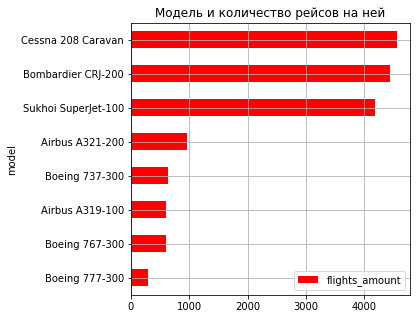

In [123]:
model_and_flights_amount_plot.sort_values(by='flights_amount').\
    plot(x='model', y='flights_amount', kind='barh', grid=True, figsize=(5, 5),\
    title='Модель и количество рейсов на ней', color='r')

### Вывод
Лидируют с большим отрывом 3 модели: Сессна 208, Бомбардье 200 и Сухой 100.
Неожиданный факт, что на первом месте Сессна, которая используется на авиалиниях малой протяженности.

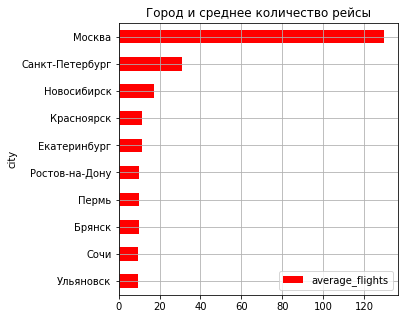

In [122]:
city_and_average_flights_plot.sort_values(by='average_flights').\
    plot(x='city', y='average_flights', kind='barh', grid=True, figsize=(5, 5),\
    title='Город и среднее количество рейсы', color='r')

### Вывод
Ожидаемо, что Москва впереди — это транспортный пул в любое время года. Питер и Новосибирск занимают 2 и 3 место. Остальные города отличаются слабо.

-------

## Проверка гипотезы средствами Python

query_last.csv — результат последнего запроса. 

В нём следующая информация:
- week_number — номер недели;
- ticket_amount — количество проданных билетов за неделю;
- festival_week — есть ли на этой неделе фестиваль;
- festival_name — название фестиваля.

Проверьте гипотезу: «Средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время».
Пороговое значение alpha задайте самостоятельно.

Поясните:
как вы формулировали нулевую и альтернативную гипотезы;
какой критерий использовали для проверки гипотез и почему.

------

Будем использовать t-критерий Стьюдента, так как сравниваемые выборки независимы между собой.

Гипотеза о равенстве средних двух генеральных совокупностей/

**Сформулируем гипотезы:**

- H0: Средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время
- H1: Средний спрос на билеты во время фестивалей отличается от среднего спроса на билеты в обычное время

In [127]:
tickets = pd.read_csv('/datasets/query_last.csv')

In [128]:
tickets['festival_name'] = tickets['festival_name'].fillna('Нет фестиваля')

In [129]:
tickets.head(10)

,week_number,ticket_amount,festival_week,festival_name
0,30,43568,30.00,Park Live
1,31,51034,31.00,Пикник Афиши
2,32,51675,nan,Нет фестиваля
3,33,51378,nan,Нет фестиваля
4,34,51492,nan,Нет фестиваля
5,35,51360,nan,Нет фестиваля
6,36,51386,36.00,Видфест
7,37,51670,nan,Нет фестиваля
8,38,51518,nan,Нет фестиваля
9,39,51623,nan,Нет фестиваля


In [130]:
alpha = 0.05

In [87]:
fest_weeks = tickets[tickets['festival_name'] != 'Нет фестиваля']['ticket_amount']
without_fest_weeks = tickets[tickets['festival_name'] == 'Нет фестиваля']['ticket_amount']

In [88]:
results = st.ttest_ind(fest_weeks, without_fest_weeks)

In [91]:
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.09688869045922928
Не получилось отвергнуть нулевую гипотезу


### Разница случайна, нет значимых различия между выборками.